# Importing necessary libraries and data

In [148]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport

In [149]:
#viewing the column key descriptions
pd.read_csv('VariableDefinitions.csv')

,Column Name,Definition
0,id,Unique identifier for each tourist
1,country,The country a tourist coming from.
2,age_group,The age group of a tourist.
3,travel_with,The relation of people a tourist travel with t...
4,total_female,Total number of females
5,total_male,Total number of males
6,purpose,The purpose of visiting Tanzania
7,main_activity,The main activity of tourism in Tanzania
8,infor_source,The source of information about tourism in Tan...
9,tour_arrangment,The arrangment of visiting Tanzania


In [150]:
#loading data
train = pd.read_csv('Train .csv')
test = pd.read_csv('Test .csv')

In [151]:
pd.set_option('display.max_columns', None)

# Data Overview
. Observations

. Sanity checks

In [152]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [153]:
train.describe()

,total_female,total_male,night_mainland,night_zanzibar,total_cost
count,4806.000000,4804.000000,4809.000000,4809.000000,4.809000e+03
mean,0.926758,1.009575,8.488043,2.304429,8.114389e+06
std,1.288242,1.138865,10.427624,4.227080,1.222490e+07
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06
max,49.000000,44.000000,145.000000,61.000000,9.953288e+07


In [154]:
train.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [155]:
#pd.set_option('display.max_rows', None)

In [156]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1601 non-null   object 
 1   country                1601 non-null   object 
 2   age_group              1601 non-null   object 
 3   travel_with            1274 non-null   object 
 4   total_female           1600 non-null   float64
 5   total_male             1599 non-null   float64
 6   purpose                1601 non-null   object 
 7   main_activity          1601 non-null   object 
 8   info_source            1601 non-null   object 
 9   tour_arrangement       1601 non-null   object 
 10  package_transport_int  1601 non-null   object 
 11  package_accomodation   1601 non-null   object 
 12  package_food           1601 non-null   object 
 13  package_transport_tz   1601 non-null   object 
 14  package_sightseeing    1601 non-null   object 
 15  pack

In [157]:
test.describe()

,total_female,total_male,night_mainland,night_zanzibar
count,1600.000000,1599.000000,1601.000000,1601.000000
mean,0.925625,1.056911,8.741412,2.495315
std,1.169807,1.309879,19.788490,6.266489
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000,0.000000
50%,1.000000,1.000000,5.000000,0.000000
75%,1.000000,1.000000,10.000000,4.000000
max,20.000000,40.000000,664.000000,174.000000


In [158]:
test.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
0,tour_1,AUSTRALIA,45-64,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,10,3,Cash,Yes,Wildlife
1,tour_100,SOUTH AFRICA,25-44,Friends/Relatives,0.0,4.0,Business,Wildlife tourism,Tanzania Mission Abroad,Package Tour,Yes,Yes,No,No,No,No,No,13,0,Cash,No,"Wonderful Country, Landscape, Nature"
2,tour_1001,GERMANY,25-44,Friends/Relatives,3.0,0.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,7,14,Cash,No,No comments
3,tour_1006,CANADA,24-Jan,Friends/Relatives,2.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,0,4,Cash,Yes,Friendly People
4,tour_1009,UNITED KINGDOM,45-64,Friends/Relatives,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,Yes,Yes,Yes,Yes,No,No,No,10,0,Cash,Yes,Friendly People


In [159]:
train.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

In [160]:
test.isnull().sum()

ID                         0
country                    0
age_group                  0
travel_with              327
total_female               1
total_male                 2
purpose                    0
main_activity              0
info_source                0
tour_arrangement           0
package_transport_int      0
package_accomodation       0
package_food               0
package_transport_tz       0
package_sightseeing        0
package_guided_tour        0
package_insurance          0
night_mainland             0
night_zanzibar             0
payment_mode               0
first_trip_tz              0
most_impressing          111
dtype: int64

In [161]:
#checking for duplicates
print(test.duplicated().sum())
print(train.duplicated().sum())

0
0


In [162]:
train.columns

Index(['ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'payment_mode', 'first_trip_tz', 'most_impressing',
       'total_cost'],
      dtype='object')

# Exploratory Data Analysis (EDA)

# 1. Top 5 countries with the highest spending statistics

In [163]:
#groupby country to get total spending by country
train.groupby('country')['total_cost'].sum().sort_values(ascending=False).head()

country
UNITED STATES OF AMERICA    8.890832e+09
UNITED KINGDOM              3.808383e+09
ITALY                       3.762160e+09
FRANCE                      3.344496e+09
AUSTRALIA                   2.743132e+09
Name: total_cost, dtype: float64

<AxesSubplot:xlabel='country'>

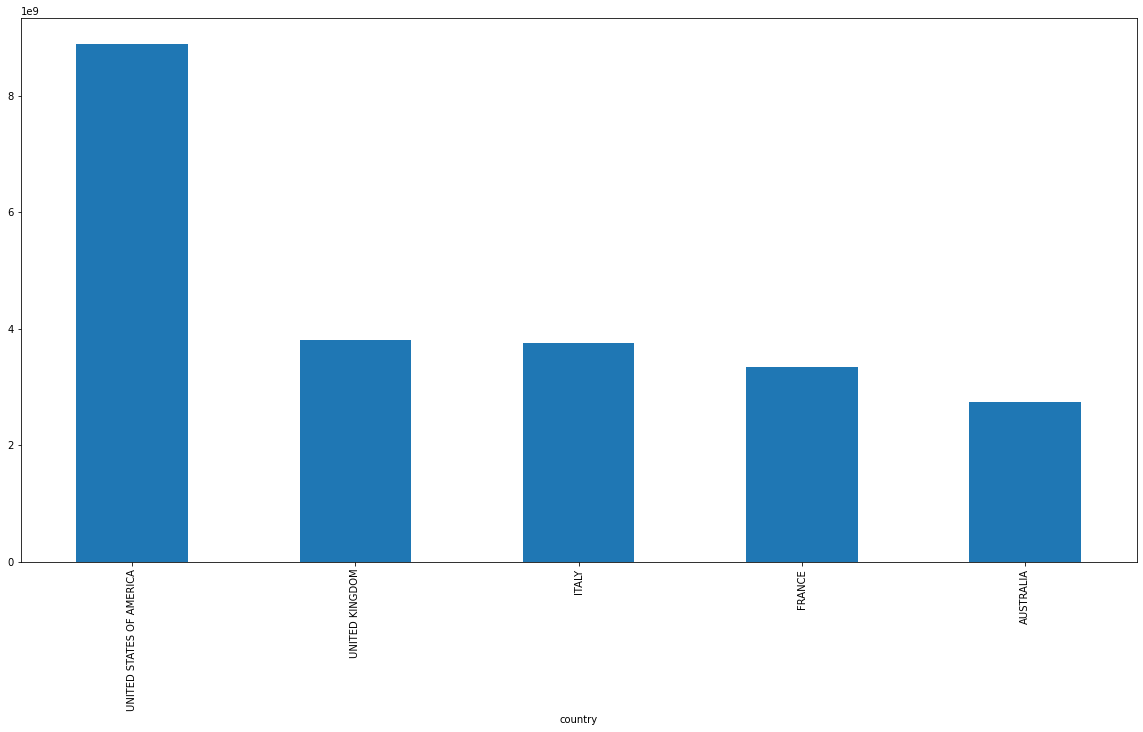

In [164]:
train.groupby('country')['total_cost'].sum().sort_values(ascending=False).head().plot(kind='bar', figsize=(20,10))

The top five countries with the highest spenders are:

1. UNITED STATES OF AMERICA ~ 8.8 billion TZS.
2. UNITED KINGDOM ~ 3.8 billion TZS.
3. ITALY ~ 3.7 billion TZS.
4. FRANCE ~ 3.3 billion TZS.
5. AUSTRALIA ~ 2.7 billion TZS.


# 2a. Age group with the highest spending

In [165]:
#groupby age_group to get total spending by age group
train.groupby('age_group')['total_cost'].sum().sort_values(ascending=False)

age_group
45-64    1.537184e+10
25-44    1.498710e+10
65+      5.284068e+09
1-24     3.379088e+09
Name: total_cost, dtype: float64

<AxesSubplot:xlabel='age_group'>

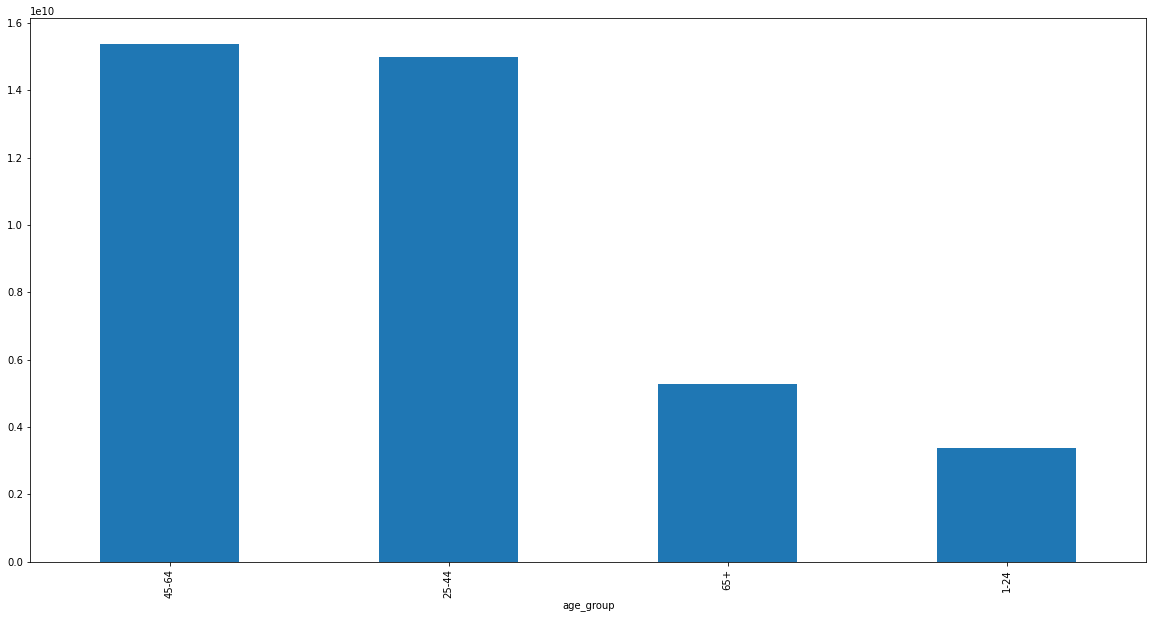

In [166]:
#groupby age_group to get total spending by age group
train.groupby('age_group')['total_cost'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(20,10))

• Tourists within the 45-64 years age group are the highest spenders with a total spending of over 15 billion TZS followed    closely by 25-44 with a total spending just shy of 15 billion.

# 2b. Highest spenders by travel_with.

In [167]:
#groupby travel_with to get total spending by travel company
train.groupby('travel_with')['total_cost'].sum().sort_values(ascending=False)

travel_with
Spouse                 1.274631e+10
Friends/Relatives      9.158700e+09
Spouse and Children    6.745753e+09
Alone                  4.334079e+09
Children               1.653502e+09
Name: total_cost, dtype: float64

<AxesSubplot:xlabel='travel_with'>

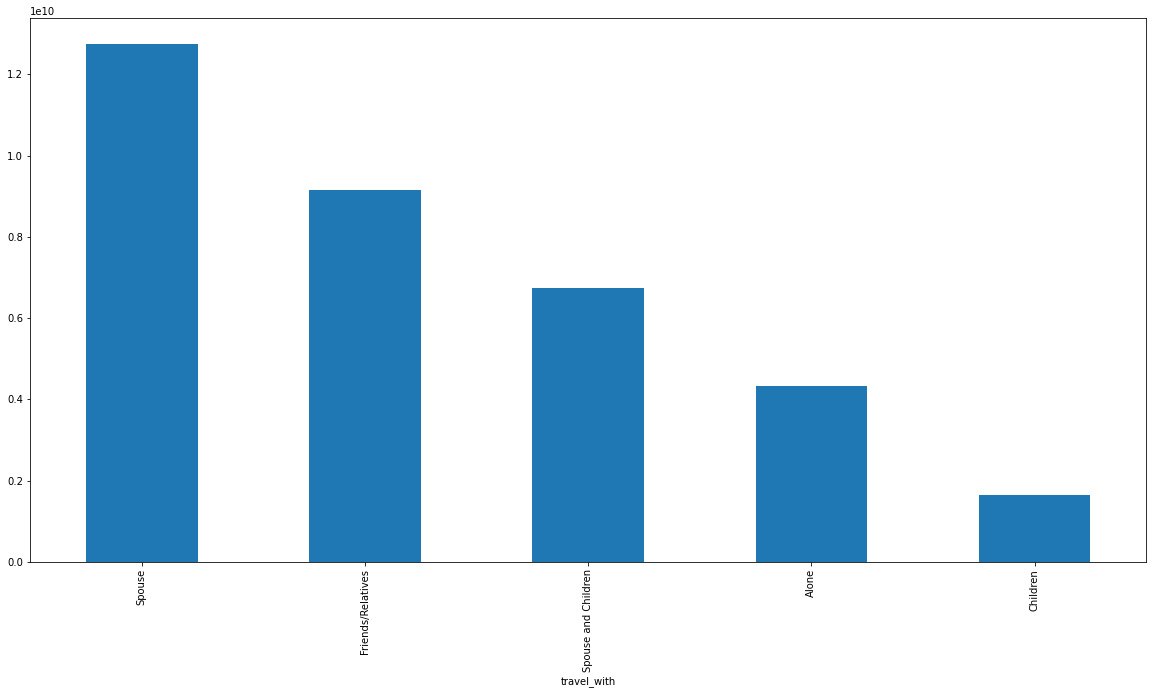

In [168]:
#bar chart of spenders by travel_with
train.groupby('travel_with')['total_cost'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(20,10))

• Those that travelled with just their spouses spent considerably more than any other group with a net expenditure of about 15  billion TZS

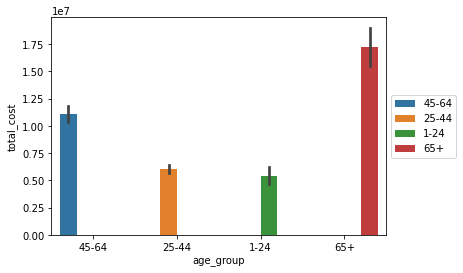

In [169]:
#Objective 2 visualization
#the visualization confirms that 65+ tourits are the highest spenders.
sns.barplot(x= "age_group",y ="total_cost", data = train, hue = "age_group")
plt.legend(loc="center left", bbox_to_anchor = (1.0,0.5))

# 3. Country with the most spending tourists.

In [170]:
#create column that displays total of male and female tourists in a group
train['total_tourists'] = train['total_female'] + train['total_male'] # create a total_tourists column in train data
test['total_tourists'] = test['total_female'] + test['total_male'] # create a total_tourists in column in test data

In [171]:
train['total_spending_pp'] = train['total_cost']/(train['total_tourists'])
train['total_spending_pp']

0        337301.25
1       3214906.50
2       3315000.00
3       3895125.00
4       1657500.00
           ...    
4804    3315000.00
4805    5345437.50
4806    2246636.70
4807     580125.00
4808    6630000.00
Name: total_spending_pp, Length: 4809, dtype: float64

In [172]:
train.groupby('country')['total_spending_pp'].sum().sort_values(ascending=False)

country
ITALY                       1.625437e+09
SOUTH AFRICA                1.346201e+09
DENMARK                     4.482293e+08
NETHERLANDS                 4.347691e+08
SWIZERLAND                  3.452496e+08
                                ...     
SPAIN                                NaN
UGANDA                               NaN
UNITED KINGDOM                       NaN
UNITED STATES OF AMERICA             NaN
ZIMBABWE                             NaN
Name: total_spending_pp, Length: 105, dtype: float64

<AxesSubplot:xlabel='country'>

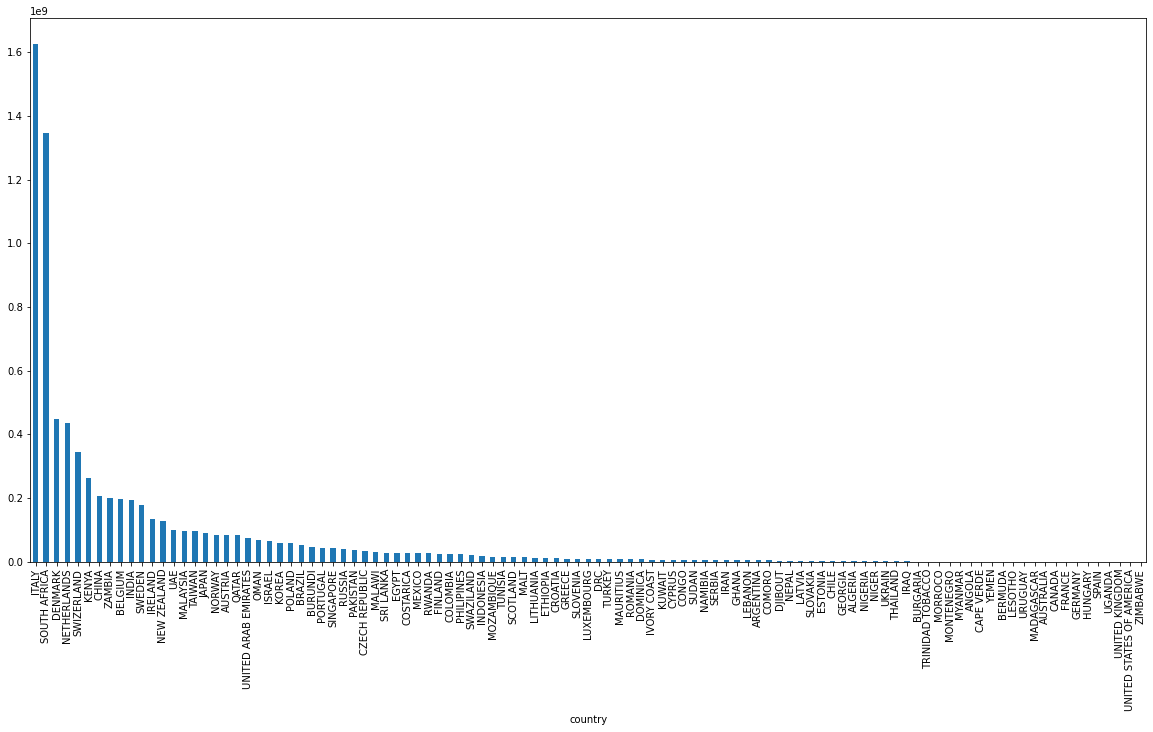

In [173]:
train.groupby('country')['total_spending_pp'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(20,10))

# 4. Average number of nights tourists spent in Tanzania Mainland.

In [174]:
train.night_mainland.mean()

8.488043252235393

On average, tourists spend 8 nights in Tanzania Mainland.

<AxesSubplot:xlabel='night_mainland'>

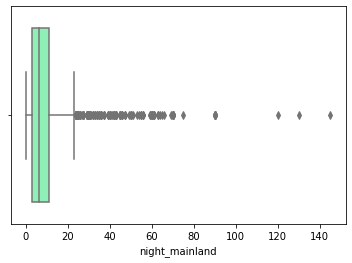

In [175]:
#visualization of objective 4
sns.boxplot(x="night_mainland",data=train,palette='rainbow')

# 5. Average number of nights tourists spend in Zanzibar

In [176]:
train.night_zanzibar.mean()

2.30442919525889

On average, tourists spend 2 nights in Zanzibar

In [177]:
train[["night_zanzibar"]].mean()
#the average number of night a tourist spends at Zanzibar is 2

night_zanzibar    2.304429
dtype: float64

<AxesSubplot:xlabel='night_zanzibar'>

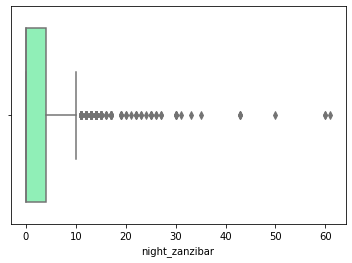

In [178]:
#visualization of objective 5
sns.boxplot(x="night_zanzibar",data=train,palette='rainbow')

# 6 The most preferred payment mode by tourists.

In [179]:
pd.crosstab(train.ID, train.payment_mode, margins = True)

payment_mode,Cash,Credit Card,Other,Travellers Cheque,All
ID,,,,,
tour_0,1,0,0,0,1
tour_10,1,0,0,0,1
tour_1000,1,0,0,0,1
tour_1002,1,0,0,0,1
tour_1004,1,0,0,0,1
...,...,...,...,...,...
tour_994,1,0,0,0,1
tour_995,1,0,0,0,1
tour_997,0,1,0,0,1


In [180]:
train.groupby('payment_mode')['total_cost'].count().sort_values(ascending=False)

payment_mode
Cash                 4172
Credit Card           622
Other                   8
Travellers Cheque       7
Name: total_cost, dtype: int64

<AxesSubplot:xlabel='payment_mode'>

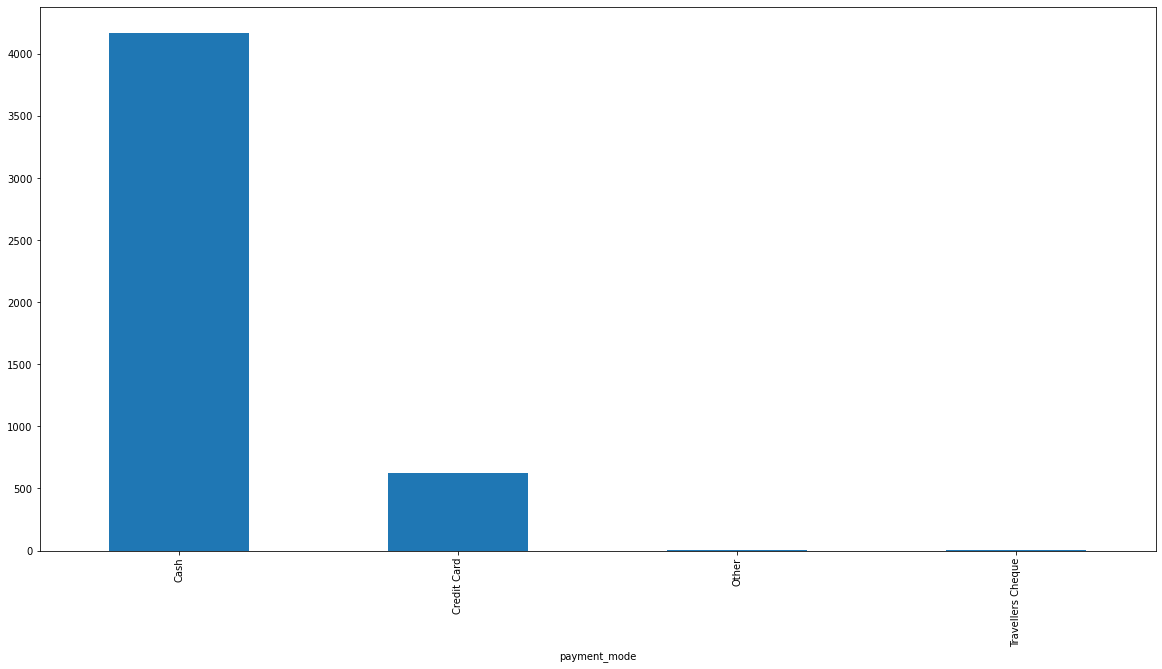

In [181]:
train.groupby('payment_mode')['total_cost'].count().sort_values(ascending=False).plot(kind='bar', figsize=(20,10))

• Most of the tourists prefer to pay with cash.

In [182]:
train["payment_mode"].value_counts().idxmax()
#Cash is the most preferred payment mode

'Cash'

<AxesSubplot:xlabel='payment_mode', ylabel='count'>

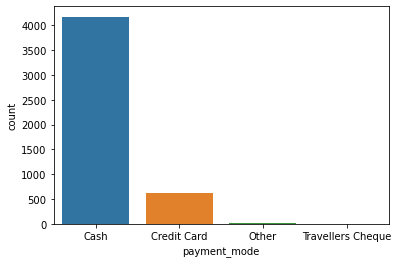

In [183]:
sns.countplot(data=train, x= "payment_mode")
#visualization proofs cash is the most preferred payment mode

# Data Preprocessing

Missing value treatment (if needed)

Feature engineering

Outlier detection and treatment (if needed)

Preparing data for modeling

Feature importance

scaling

# missing value already treated above

# Feature Engineering

In [184]:
#feature engineering is simply addition, deletion, combination, mutation of the dataset
data= train
originalFeatures = data.columns
print("originalFeatures count" , len(originalFeatures))
print("originalFeaturs" , originalFeatures)
print(data.head())
#this is the first step of the feature engineering phase, this help explore all the column, to see where datas are repeated or
#not relevant to the data we are predicting.


originalFeatures count 25
originalFeaturs Index(['ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'payment_mode', 'first_trip_tz', 'most_impressing',
       'total_cost', 'total_tourists', 'total_spending_pp'],
      dtype='object')
          ID         country age_group        travel_with  total_female  \
0     tour_0      SWIZERLAND     45-64  Friends/Relatives           1.0   
1    tour_10  UNITED KINGDOM     25-44                NaN           1.0   
2  tour_1000  UNITED KINGDOM     25-44              Alone           0.0   
3  tour_1002  UNITED KINGDOM     25-44             Spouse           1.0   
4  tour_1004           CHINA      1-24                NaN           1.0   



In [185]:
#we will merge night in mainland and night in zanzibar as number of night
#number of male and female as number of persons, the drop the column ID number because it is not necessary to determine totalcost
train["total_nights"]= train["night_zanzibar"]+train["night_mainland"]

train["total_persons"]= train["total_female"]+train["total_male"]

In [186]:
#dropping the column ID
train.drop("ID",axis=1,inplace=True)

In [187]:
#dot head to see changes
train.head()

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost,total_tourists,total_spending_pp,total_nights,total_persons
0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5,2.0,337301.25,13.0,2.0
1,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5,1.0,3214906.50,21.0,1.0
2,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0,1.0,3315000.00,32.0,1.0
3,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0,2.0,3895125.00,11.0,2.0
4,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0,1.0,1657500.00,11.0,1.0


# OUTLIER DETECTION

<AxesSubplot:xlabel='total_cost'>

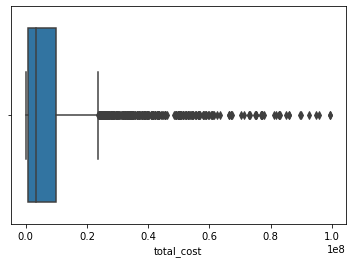

In [188]:
#we will detect outliers by checking some variable using boxplot
sns.boxplot(x= "total_cost", data=train)
#shows lots of outliers

<AxesSubplot:xlabel='total_nights'>

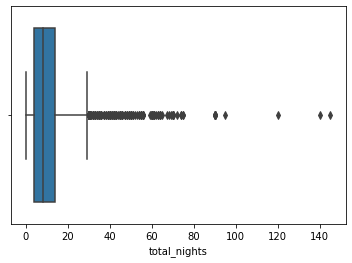

In [189]:
sns.boxplot(x= "total_nights", data=train)

# 7. Most profitable aspects of tourism in Tanzania.

In [190]:
train.groupby('main_activity')['total_cost'].sum().sort_values(ascending=False)

main_activity
Wildlife tourism            2.393484e+10
Beach tourism               7.712958e+09
Conference tourism          3.782597e+09
Cultural tourism            1.432819e+09
Hunting tourism             8.734764e+08
business                    4.712545e+08
Mountain climbing           4.359085e+08
Diving and Sport Fishing    2.222264e+08
Bird watching               1.560128e+08
Name: total_cost, dtype: float64

<AxesSubplot:xlabel='main_activity'>

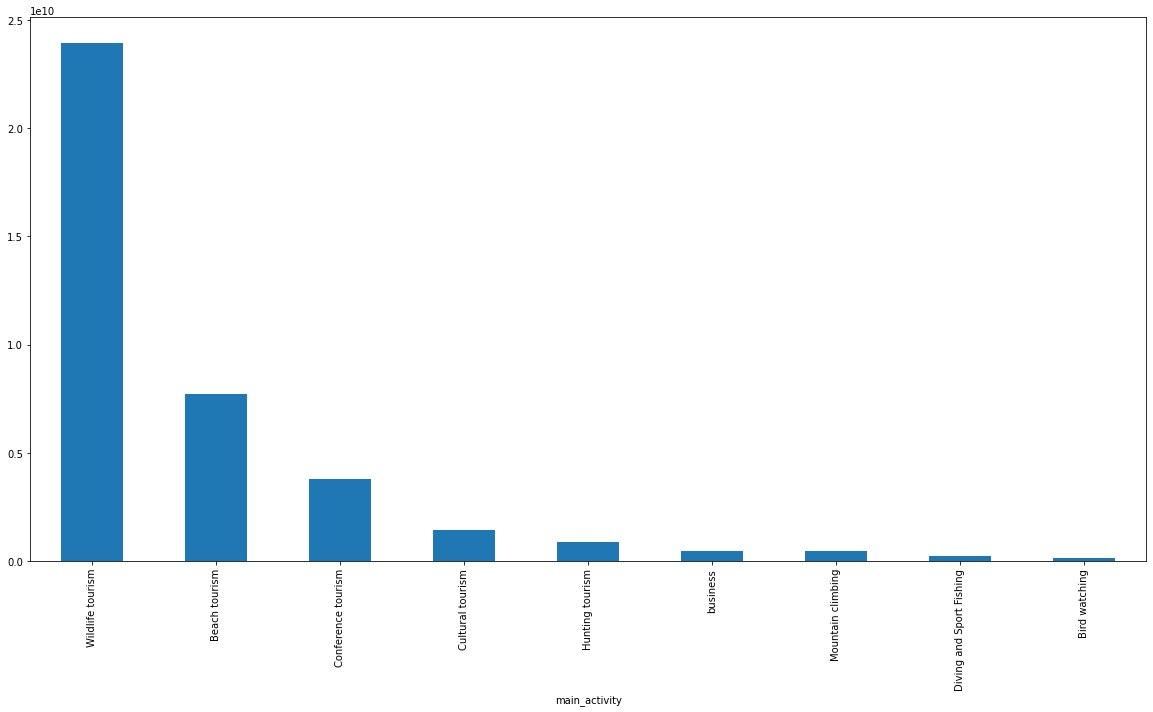

In [191]:
train.groupby('main_activity')['total_cost'].sum().sort_values(ascending=False).sort_values(ascending=False).plot(kind='bar', figsize=(20,10))

In [192]:
train.groupby('main_activity')['total_cost'].mean().sort_values(ascending=False)

main_activity
Diving and Sport Fishing    1.709434e+07
Wildlife tourism            1.059533e+07
Conference tourism          1.030680e+07
business                    8.125078e+06
Beach tourism               7.524837e+06
Bird watching               4.216563e+06
Cultural tourism            3.991139e+06
Hunting tourism             1.911327e+06
Mountain climbing           1.862857e+06
Name: total_cost, dtype: float64

<AxesSubplot:xlabel='main_activity'>

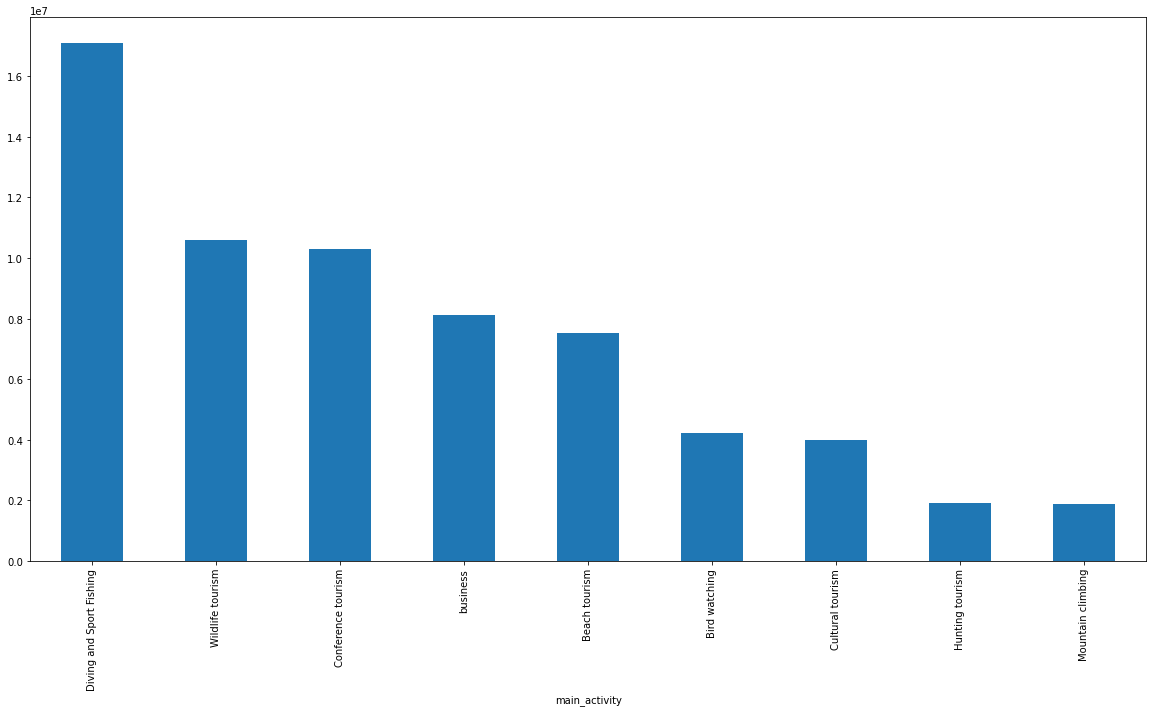

In [193]:
train.groupby('main_activity')['total_cost'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(20,10))

In [194]:
train.groupby('main_activity')['total_cost'].count().sort_values(ascending=False)

main_activity
Wildlife tourism            2259
Beach tourism               1025
Hunting tourism              457
Conference tourism           367
Cultural tourism             359
Mountain climbing            234
business                      58
Bird watching                 37
Diving and Sport Fishing      13
Name: total_cost, dtype: int64

<AxesSubplot:xlabel='main_activity'>

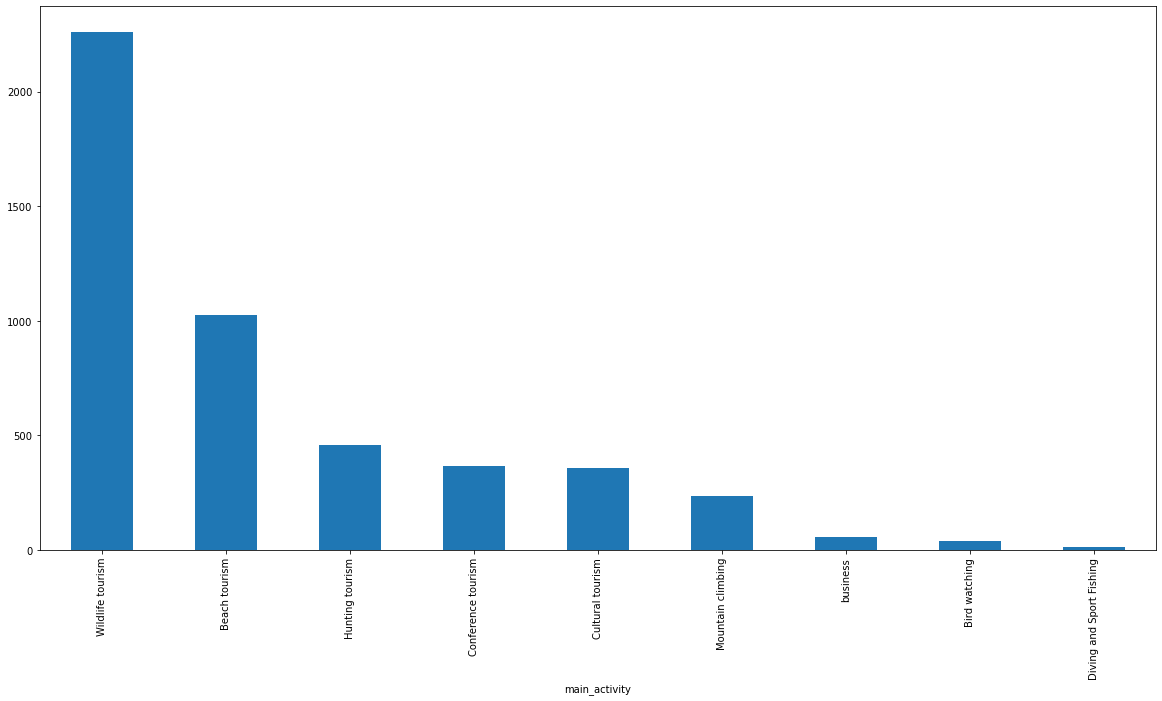

In [195]:
train.groupby('main_activity')['total_cost'].count().sort_values(ascending=False).plot(kind='bar', figsize=(20,10))

Wildlife tourism is the most profitable aspect of tourism in Tanzania according to this dataset as it tourists spent over 20 billion TZS on that aspect alone.

# 8. Most sought after foods by tourists.

• No info on foods consumed by tourists in data

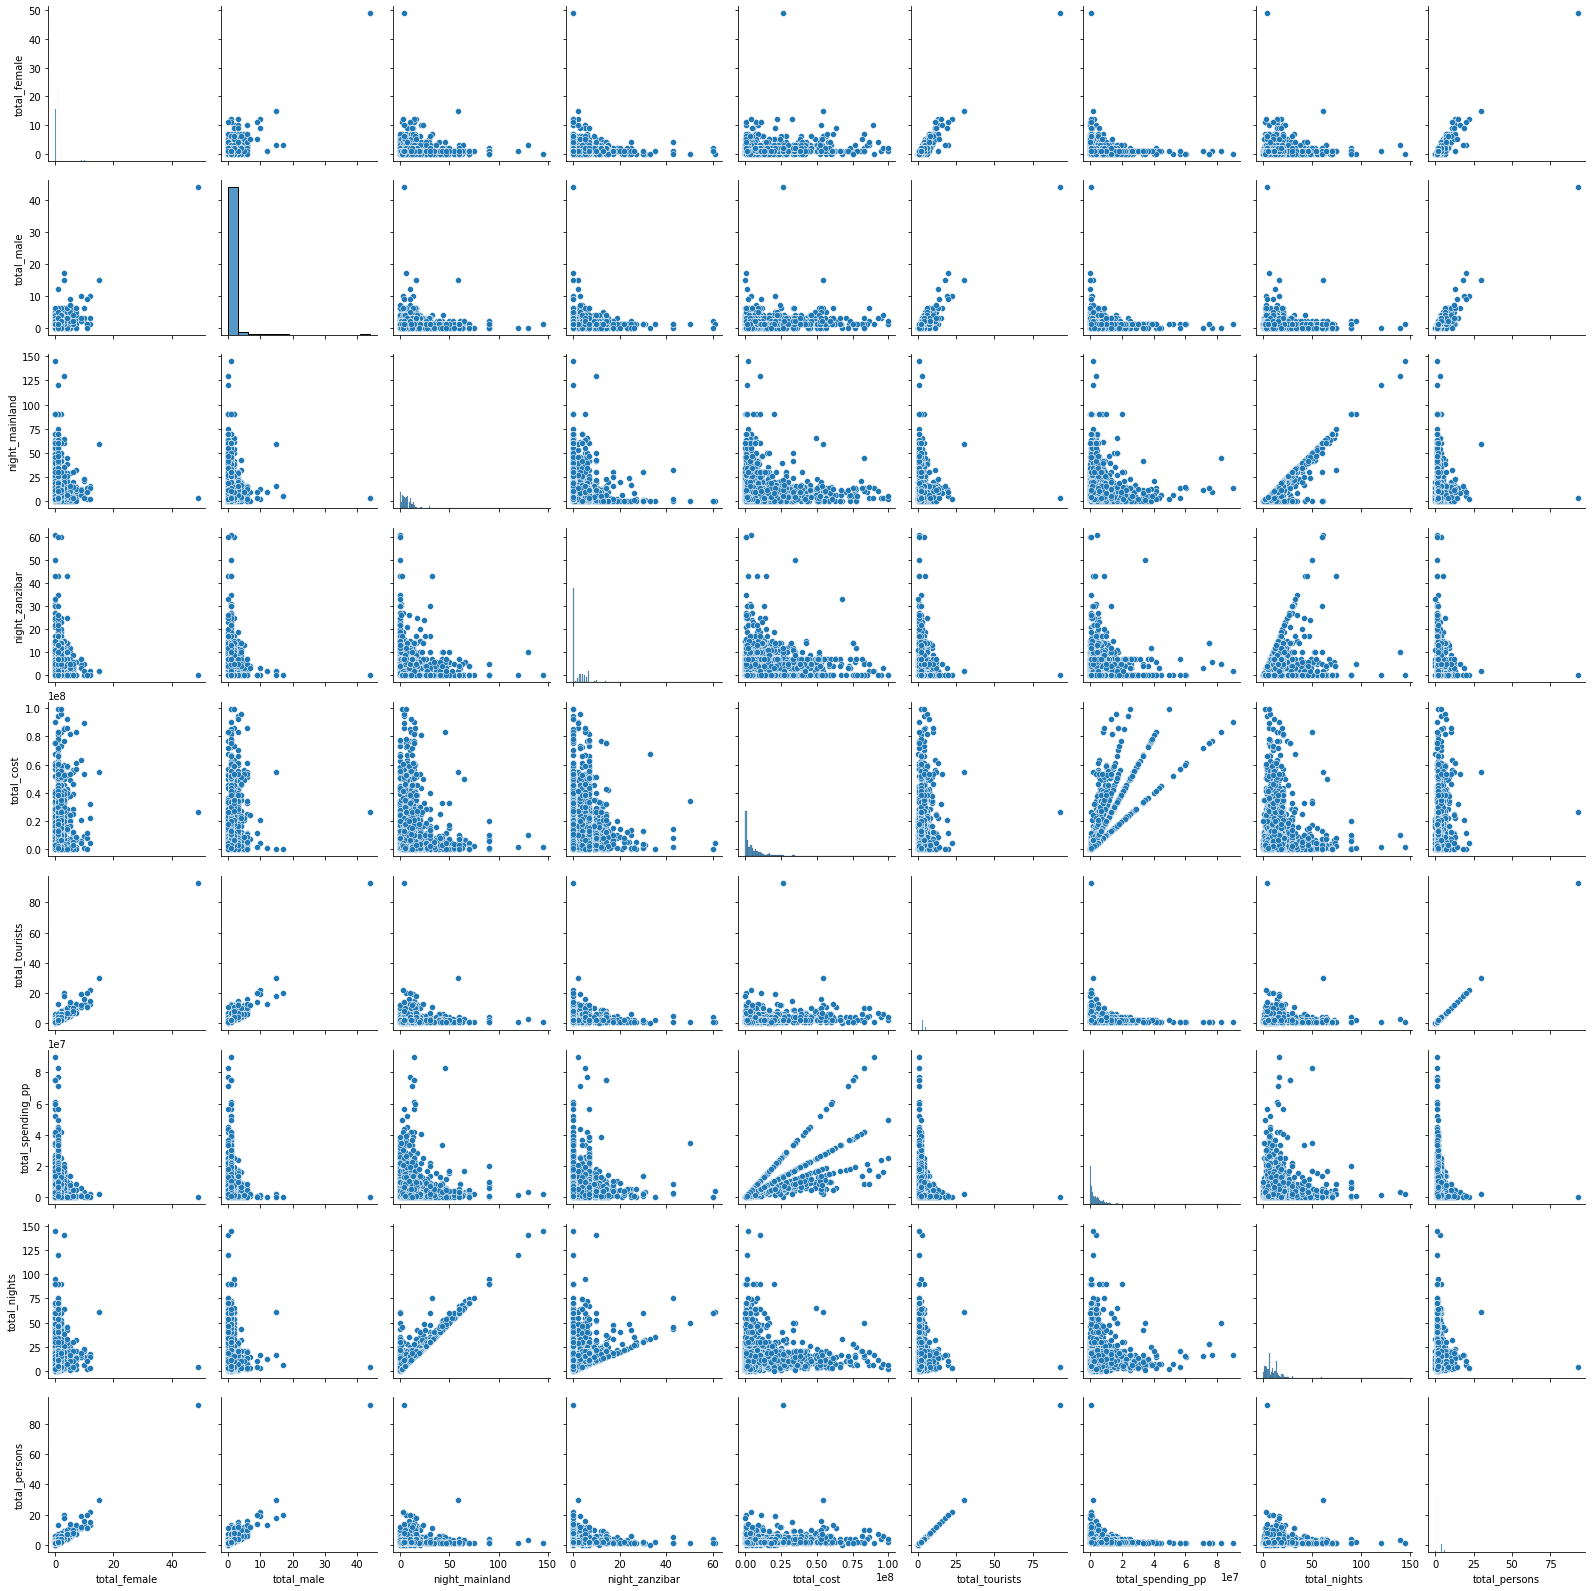

In [196]:
sns.pairplot(train)

<AxesSubplot:>

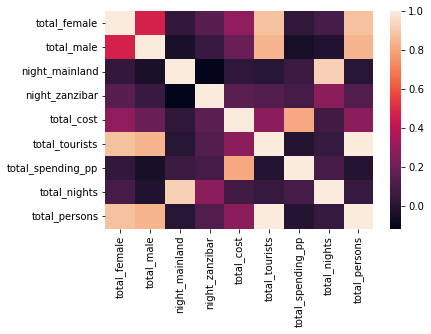

In [197]:
sns.heatmap(train.corr())

# Data Preprocessing

In [198]:
#fill most_impressing NaN values with 'No comments'
train['most_impressing'].fillna('No comments', inplace=True)
test['most_impressing'].fillna('No comments', inplace=True)

'''I did this because I feel missing reviews is same as no comments'''

'I did this because I feel missing reviews is same as no comments'

# Data Cleaning

In [199]:
#conditional statement that picks NaN cells and fills them with most likely arrangement
train.loc[(train['total_tourists'] == 0) & (train['travel_with'] == 'Spouse'), ('total_male', 'total_female', 'total_tourists')] = (1, 1, 2) #fixing train total_male & total_female values for entries with 0 total_tourists
test.loc[(test['total_tourists'] == 0) & (test['travel_with'] == 'Spouse'), ('total_male', 'total_female', 'total_tourists')] = (1, 1, 2) #fixing test total_male & total_female values for entries with 0 total_tourists
train.loc[(train['total_tourists'] == 0) & (train['travel_with'] == 'Alone'), 'total_tourists'] = 1 #fixing train total_tourists values for entries with 0 total_tourists & travel_with == 'Alone'
test.loc[(test['total_tourists'] == 0) & (test['travel_with'] == 'Alone'), 'total_tourists'] = 1 #fixing test total_tourists values for entries

In [200]:
#note that total_tourists will be NaN if total_male|total_female is NaN
train.loc[(train['total_tourists'] == 1) & (train['travel_with'].isnull()), 'travel_with'] = 'Alone' #fill train NaN travel_with with 'Alone' if total_tourists is 1
test.loc[(test['total_tourists'] == 1) & (test['travel_with'].isnull()), 'travel_with'] = 'Alone' #fill test NaN travel_with with 'Alone' if total_tourists is 1

In [201]:
train.loc[(train['total_male'] == 1) & (train['total_female'] == 1), 'travel_with'] = 'Spouse' #fill train NaN travel_with with 'Spouse' if tour group has 1 male & 1 female
test.loc[(test['total_male'] == 1) & (test['total_female'] == 1), 'travel_with'] = 'Spouse' #fill test NaN travel_with with 'Spouse' if tour group has 1 male & 1 female

In [202]:
#fill the remaining NaN travel_with cells with 'Friends/Relatives' if total_male|total_female > 1 member
train.loc[train['travel_with'].isnull() & ((train['total_male'] > 1) | (train['total_female'] > 1)), 'travel_with'] = 'Friends/Relatives' 
test.loc[test['travel_with'].isnull() & ((test['total_male'] > 1) | (test['total_female'] > 1)), 'travel_with'] = 'Friends/Relatives'


In [203]:
#drop the remaining NaN entries since not enough info to fill
train.dropna(inplace=True)
test.dropna(inplace=True)

In [204]:

#drop the remaining rows without tourists
train.drop(train.loc[(train['total_tourists'] == 0)].index, inplace=True)
test.drop(test.loc[(test['total_tourists'] == 0)].index, inplace=True)

'''This section of code takes care of all NaN values in the DataFrames'''

'This section of code takes care of all NaN values in the DataFrames'

In [205]:
train.isnull().sum()

country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
most_impressing          0
total_cost               0
total_tourists           0
total_spending_pp        0
total_nights             0
total_persons            0
dtype: int64

In [206]:
test.isnull().sum()

ID                       0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
most_impressing          0
total_tourists           0
dtype: int64

In [207]:
test

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_tourists
0,tour_1,AUSTRALIA,45-64,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,10,3,Cash,Yes,Wildlife,2.0
1,tour_100,SOUTH AFRICA,25-44,Friends/Relatives,0.0,4.0,Business,Wildlife tourism,Tanzania Mission Abroad,Package Tour,Yes,Yes,No,No,No,No,No,13,0,Cash,No,"Wonderful Country, Landscape, Nature",4.0
2,tour_1001,GERMANY,25-44,Friends/Relatives,3.0,0.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,7,14,Cash,No,No comments,3.0
3,tour_1006,CANADA,24-Jan,Friends/Relatives,2.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,0,4,Cash,Yes,Friendly People,2.0
4,tour_1009,UNITED KINGDOM,45-64,Friends/Relatives,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,Yes,Yes,Yes,Yes,No,No,No,10,0,Cash,Yes,Friendly People,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,tour_988,UNITED STATES OF AMERICA,25-44,Alone,0.0,1.0,Meetings and Conference,Mountain climbing,"Newspaper, magazines,brochures",Independent,No,No,No,No,No,No,No,1,0,Cash,No,No comments,1.0
1597,tour_990,ITALY,45-64,Spouse and Children,3.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,No,Yes,Yes,Yes,Yes,No,No,10,5,Other,Yes,Wildlife,4.0
1598,tour_992,FINLAND,25-44,Alone,0.0,1.0,Meetings and Conference,Mountain climbing,"Friends, relatives",Independent,No,No,No,No,No,No,No,6,0,Cash,Yes,No comments,1.0
1599,tour_996,SOUTH AFRICA,24-Jan,Alone,0.0,1.0,Business,Beach tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,4,0,Cash,Yes,Wildlife,1.0


In [208]:
train.duplicated().sum()

14

# EDA

• It is a good idea to explore the data once again after manipulating it

In [209]:
#groupby country to get total spending by country
train.groupby('country')['total_cost'].sum().sort_values(ascending=False).head()

country
UNITED STATES OF AMERICA    8.842599e+09
UNITED KINGDOM              3.803830e+09
ITALY                       3.753083e+09
FRANCE                      3.322145e+09
AUSTRALIA                   2.732855e+09
Name: total_cost, dtype: float64

The top five vountries with the highest spenders are:

1. UNITED STATES OF AMERICA ~ 8.8 billion TZS.
2. UNITED KINGDOM ~ 3.8 billion TZS.
3. ITALY ~ 3.7 billion TZS.
4. FRANCE ~ 3.3 billion TZS.
5. AUSTRALIA ~ 2.7 billion TZS.

# Age group with the highest spending.

In [210]:
#groupby age_group to get total spending by age group
train.groupby('age_group')['total_cost'].sum().sort_values(ascending=False)

age_group
45-64    1.517184e+10
25-44    1.486671e+10
65+      5.273792e+09
1-24     3.354079e+09
Name: total_cost, dtype: float64

• Tourists within the 45-64 years age group are the highest spenders with a total spending of over 15 billion TZS followed closely by 25-44 with a total spending just shy of 15 billion.

# Highest spenders by travel_with

In [211]:
#groupby travel_with to get total spending by travel company
train.groupby('travel_with')['total_cost'].sum().sort_values(ascending=False).head()

travel_with
Spouse                 1.546010e+10
Alone                  8.394221e+09
Friends/Relatives      6.930590e+09
Spouse and Children    6.670622e+09
Children               1.210901e+09
Name: total_cost, dtype: float64

• Those that travelled with just their spouses spent considerably more than any other group with a net expenditure of about 15 billion TZS.

# Country with the most spending tourists

# Average number of nights tourists spent in Tanzania Mainland.

In [212]:
train.night_mainland.mean()

8.488313856427379

• On average, tourists spend 8 nights in Tanzania Mainland.

# Average number of nights tourists spend in Zanzibar.

In [215]:
train.night_zanzibar.mean()

2.2969532554257097

• On average, tourists spend 2 nights in Zanzibar.

# The most preferred payment mode by tourists.

In [216]:
pd.crosstab(train.ID, train.payment_mode, margins = True)

AttributeError: 'DataFrame' object has no attribute 'ID'

• Most of the tourists prefer to pay with cash.

# Most profitable aspects of tourism in Tanzania.

In [ ]:
train.groupby('main_activity')['total_cost'].sum().sort_values(ascending=False)

In [ ]:
train.groupby('main_activity')['total_cost'].mean().sort_values(ascending=False)

this is the most profitable aspect of tourism in Tanzania according to this dataset as it tourists spent over 20 billion TZS on that aspect alone.

# Most sought after foods by tourists

• No info on foods consumed by tourists in data.

In [ ]:
train.head()

In [ ]:
train.columns

In [ ]:
y = train[['total_cost']]
X = train[['country', 'age_group', 'total_tourists',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'payment_mode', 'first_trip_tz', 'most_impressing', 'travel_with']]
X

In [ ]:
#importing preprocessing
from sklearn.preprocessing import LabelEncoder

#assigning label_encoder
l_encoder = LabelEncoder()

#encoding encodables
for column in X[['country', 'age_group', 'travel_with', 'purpose', 'main_activity', 'info_source', 'tour_arrangement', 'package_transport_int', 'package_accomodation', 'package_food', 'package_transport_tz', 'package_sightseeing', 'package_guided_tour', 'package_insurance', 'payment_mode', 'first_trip_tz', 'most_impressing']]:
    X[column] = l_encoder.fit_transform(X[column])
    
X.info()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

data_scaler = MinMaxScaler(feature_range = (0,2))


y = data_scaler.fit_transform(y) y

In [ ]:
X = data_scaler.fit_transform(X)
X

# Encoding object types

# Building a Regression Model

#fitting the data from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() y = scaler.fit_transform(y) X = scaler.fit_transform(X)

In [ ]:
#train, t4est splitting
from sklearn.model_selection import train_test_split

X_train,x_val,y_train,y_val = train_test_split(X,y,test_size=0.7,random_state=2)

In [ ]:
#applying linear regression tool
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
print(model.coef_)
print(model.intercept_)

In [ ]:
predictions = model.predict(x_val)
predictions

# Evaluate Model Performances

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

score = r2_score(predictions, y_val)
score

In [ ]:
mean_absolute_error(predictions, y_val)

In [ ]:
mean_squared_error(predictions, y_val)

In [ ]:
np.sqrt(mean_squared_error(predictions, y_val))

# Testing Linear Model Assumptions

# Actionable Insights and Recommendations